# Exploratory Data Analysis 
## Used Car Price Prediction
- Author: Amelia Tang

In [1]:
import numpy as np
import pandas as pd
import altair as alt
from sklearn.model_selection import train_test_split
#from pandas_profiling import ProfileReport

alt.renderers.enable('mimetype')

RendererRegistry.enable('mimetype')

### Load the data 
The data set contains 4960 rows of data. Each row represents a used car in UK and provides its ID, brand, model name, year, transmission type, mileage, fuel type, tax, miles per gallon(mpg), the size of engine and its sales price.  

Among all the features, categorical features are `brand`, `model`,`transmission` and `fuelType`. Numeric features are `mileage`, `tax`, `mpg` and `engineSize`. The feature `year` is ordinal in nature.

`carID` is not a feature of interest in this analysis because it just refers to a particular used car.  

NOTE: Since the data set was created in the Kaggle competition format, I needed to combine `X_train` and `y_train` for EDA purpose.  

In [2]:
X_train = pd.read_csv("../data/raw/X_train.csv", parse_dates=['year'])
X_train['year'] = X_train['year'].dt.year
y_train = pd.read_csv("../data/raw/y_train.csv")
train_df = X_train.join(y_train.set_index('carID'), on = "carID")

In [3]:
train_df.head()

carID     brand      model  year transmission  mileage fuelType    tax  \
0  13207    hyundi   Santa Fe  2019    Semi-Auto     4223   Diesel  145.0   
1  17314  vauxhall        GTC  2015       Manual    47870   Diesel  125.0   
2  12342      audi        RS4  2019    Automatic     5151   Petrol  145.0   
3  13426        vw   Scirocco  2016    Automatic    20423   Diesel   30.0   
4  16004     skoda      Scala  2020    Semi-Auto     3569   Petrol  145.0   

    mpg  engineSize  price  
0  39.8         2.2  31995  
1  60.1         2.0   7700  
2  29.1         2.9  58990  
3  57.6         2.0  12999  
4  47.1         1.0  16990

In [16]:
train_df.brand.unique()

array(['hyundi', 'vauxhall', 'audi', 'vw', 'skoda', 'merc', 'toyota',
       'bmw', 'ford'], dtype=object)

In [17]:
train_df.model.unique()

array([' Santa Fe', ' GTC', ' RS4', ' Scirocco', ' Scala', ' V Class',
       ' Prius', ' M4', ' Camry', ' KA', ' Vivaro', ' CLS Class',
       ' Caravelle', ' Arteon', ' Shuttle', ' I40', ' IX20', ' 6 Series',
       ' GL Class', ' S Class', ' S3', ' Yeti', ' Galaxy', ' Puma',
       ' Edge', ' A8', ' SLK', ' Kamiq', ' RS6', ' CLA Class',
       ' Land Cruiser', ' M Class', ' Q8', ' i3', ' Verso', ' Mustang',
       ' IX35', ' Amarok', ' Avensis', ' Grand Tourneo Connect',
       ' Antara', ' Tourneo Connect', ' Beetle', ' X4', ' CC', ' GT86',
       ' X-CLASS', ' I800', ' i8', ' Caddy Maxi Life', ' Combo Life',
       ' Rapid', ' SQ7', ' Grand C-MAX', ' Tourneo Custom', ' California',
       ' Agila', ' A7', ' Zafira Tourer', ' G Class', ' Tiguan Allspace',
       ' X6', ' M2', ' X7', ' 7 Series', ' Z4', ' RS5', ' Hilux',
       ' GLS Class', ' GLB Class', ' M5', ' RS3', ' Caddy Life', ' SQ5',
       ' Supra', ' 8 Series', ' Fusion', ' M6', ' M3', ' Jetta', ' S4',
       ' R8', ' PRO

In [19]:
train_df.transmission.unique()

array(['Semi-Auto', 'Manual', 'Automatic', 'Other'], dtype=object)

In [20]:
train_df.fuelType.unique()

array(['Diesel', 'Petrol', 'Hybrid', 'Other', 'Electric'], dtype=object)

In [4]:
train_df.shape

(4960, 11)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4960 entries, 0 to 4959
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carID         4960 non-null   int64  
 1   brand         4960 non-null   object 
 2   model         4960 non-null   object 
 3   year          4960 non-null   int64  
 4   transmission  4960 non-null   object 
 5   mileage       4960 non-null   int64  
 6   fuelType      4960 non-null   object 
 7   tax           4960 non-null   float64
 8   mpg           4960 non-null   float64
 9   engineSize    4960 non-null   float64
 10  price         4960 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 426.4+ KB


<br>

### Descriptive Statistics
The `mileage` seemed to have a relatively large standard deviation. The 25 and 75 percentile prices of the regression target `price` were 12,000 and 30,336 British Pounds.    

In [6]:
train_df.describe()

carID         year        mileage          tax          mpg  \
count   4960.000000  4960.000000    4960.000000  4960.000000  4960.000000   
mean   15832.446169  2016.737903   24956.286895   152.332661    50.370766   
std     2206.717006     2.884035   24443.333662    82.403844    35.746505   
min    12002.000000  1997.000000       1.000000     0.000000     2.800000   
25%    13929.250000  2016.000000    5641.250000   145.000000    38.700000   
50%    15840.000000  2017.000000   19000.000000   145.000000    47.100000   
75%    17765.750000  2019.000000   36702.000000   150.000000    54.300000   
max    19629.000000  2020.000000  259000.000000   580.000000   470.800000   

        engineSize          price  
count  4960.000000    4960.000000  
mean      2.124375   23469.943750  
std       0.789368   16406.714563  
min       0.000000     450.000000  
25%       1.600000   12000.000000  
50%       2.000000   18999.000000  
75%       2.800000   30335.750000  
max       6.600000  145000.000000

In [7]:
np.percentile(train_df['price'], [25 ,75])

array([12000.  , 30335.75])

<br>

### EDA
#### Overview
First, I used `Pandas Profiling` to create an overview and the report can be found [here](https://github.com/aimee0317/car_price_prediction/blob/main/EDA/pandas_profiling.html). 

In [8]:
#profile = ProfileReport(train_df, title="Pandas Profiling Report")

In [9]:
#profile.to_file("pandas_profiling.html")

<br>

#### Price Distribution
I further examined the distribution of used car prices and the distribution is right-skewed. 

/Users/amelia/opt/miniconda3/envs/car_price/lib/python3.10/site-packages/altair/utils/core.py:317: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for col_name, dtype in df.dtypes.iteritems():


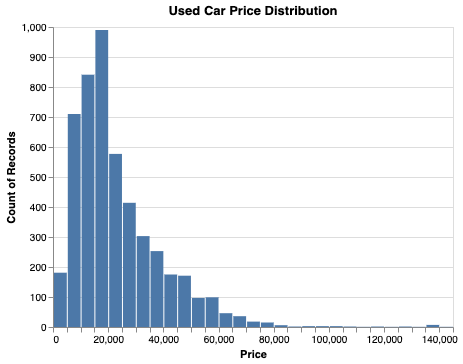

In [10]:
alt.Chart(train_df, title ="Used Car Price Distribution").mark_bar().encode(
    alt.X('price', bin=alt.Bin(maxbins=30), title="Price"),
    y='count()')

<br>

#### Price vs. Year
It seemed that `year` and `price` were correlated according to the `Pandas Profiling` report, so I created a scatter plot to explore the relationship. It showed that as the year came to more recent, the prices tended to increase.  

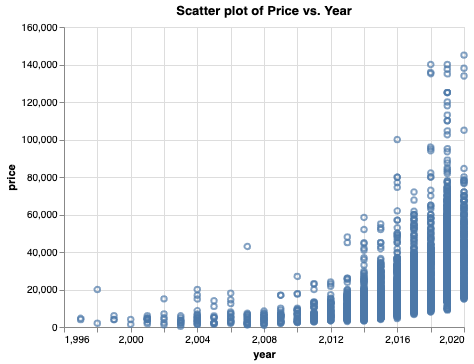

In [11]:
alt.Chart(train_df, title ="Scatter plot of Price vs. Year").mark_point().encode(
    alt.X('year',scale=alt.Scale(zero=False)),
    y='price',
)

<br>

#### Brand vs. Price

As commonly known that cars from different brands usually had differently ranges of prices, I created the side-by-side box plots and found that the price of Audi, BMW and Mercedes tend to be higher than the most other brands' and Vauxhall, Skoda and Hyundai tended to have lower prices. The prices of each brand's cars seemed to increase as years became more recent.  

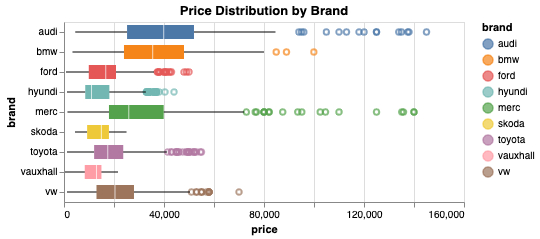

In [12]:
(alt.Chart(train_df, title="Price Distribution by Brand")
 .mark_boxplot().encode(
     x='price',
     y=alt.Y('brand'),
     color='brand'))

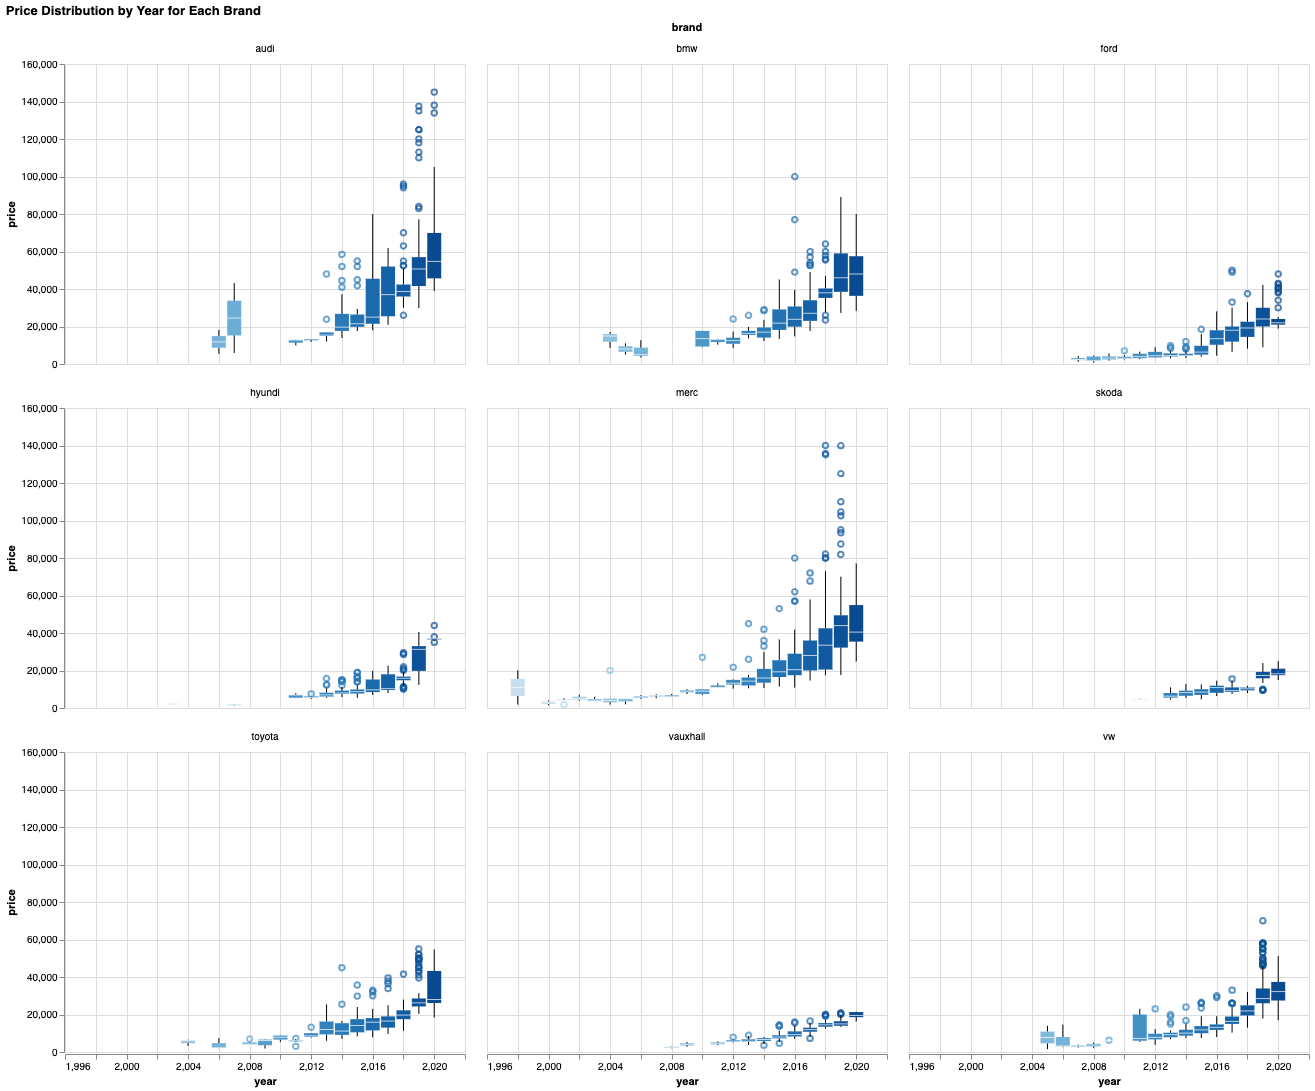

In [13]:
alt.Chart(train_df).mark_boxplot().encode(
     y='price',
     x=alt.X('year', scale=alt.Scale(zero=False)),
     color=alt.Color('year', legend=None)
                ).facet('brand', columns=3, title = 'Price Distribution by Year for Each Brand')

<br>

#### Correlations 
According to the correlation plots, as the year came to more recent, the price tended to be higher. The cars with smallest mpg tended to have the highest prices.  

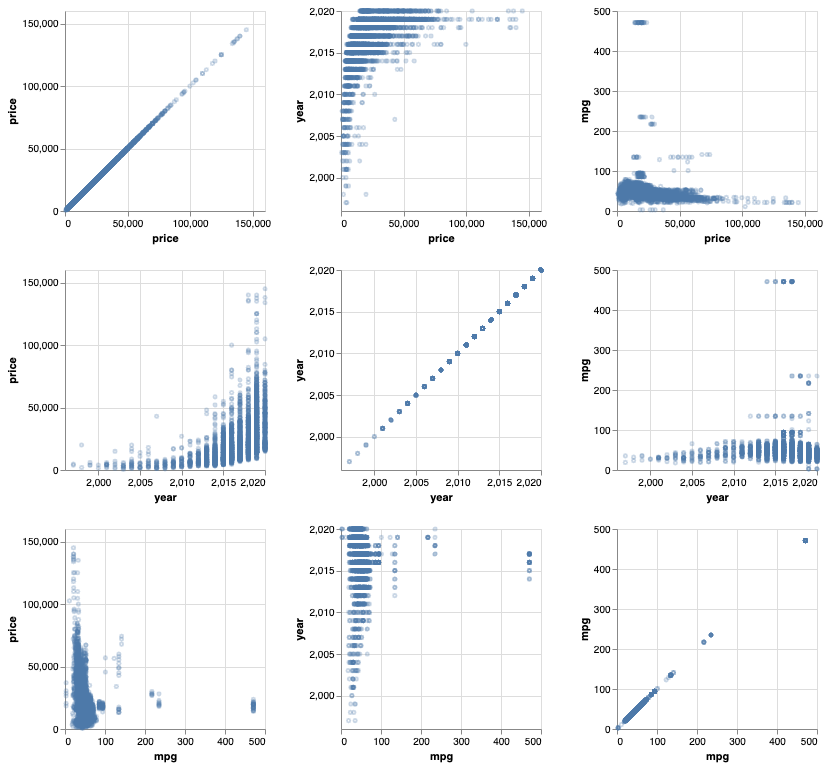

In [14]:
alt.Chart(train_df).mark_point(opacity=0.3, size=10).encode(
     alt.X(alt.repeat('row'), type='quantitative', scale=alt.Scale(zero=False)),
     alt.Y(alt.repeat('column'), type='quantitative', scale=alt.Scale(zero=False))
).properties(
    width=200,
    height=200
).repeat(
    column=['price', 'year', 'mpg'],
    row=['price', 'year', 'mpg']
)